<h1>Vmesno poročilo</h1>

<h3>Glavni problem</h3>
Za projekt smo si izbrali analizirati vzroke in vzorce rasti prebivalca. To smo si izbrali vglavnem zato, ker velikokrat slišimo napačne komentare in ugotovitve. Dataset smo našli na uradni strani Združenih narodov, ker so podatki bili precej vredu strukturirani in nam je to omogočilo, da takoj gremo z zanimivejšim stvarem. Ta dataset se nam je tudi zdel zelo objektiven. Zaenkrat smo analizirali samo rast prebivalstva do danes. Kasneje pa bomo še za prihodnost.

Vir podatkov:
<a>https://esa.un.org</a>

In [2]:
from csv import DictReader
from collections import defaultdict
from numpy import *
import matplotlib.pyplot as plt
set_printoptions(suppress=True)

<h2>Svetovna populacija skozi čas</h2>


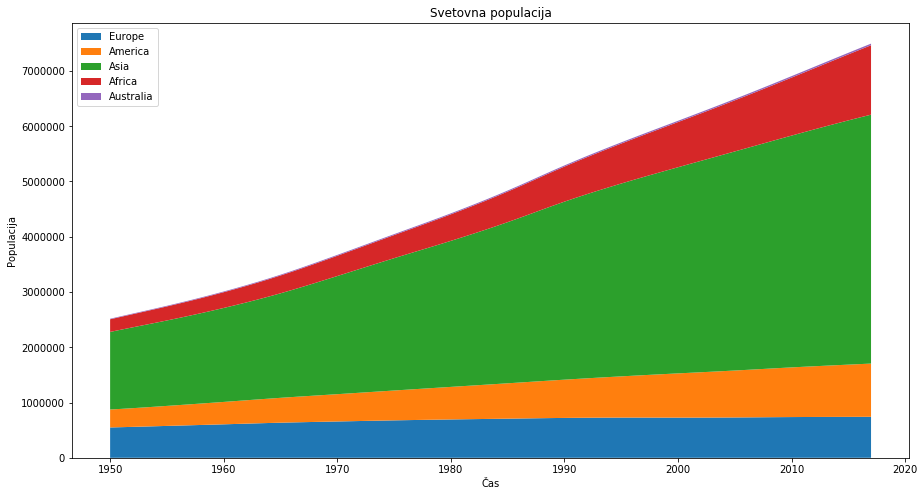

In [17]:
region = defaultdict()
def worldPopulationVisualisation(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2018)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,8))
    plt.stackplot(x, europe, america, asia, africa, australia, labels=['Europe', 'America', "Asia", "Africa", "Australia"])
    plt.legend(loc='upper left')
    plt.title("Svetovna populacija")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

worldPopulationVisualisation("WPP2017_TotalPopulationBySex.csv")

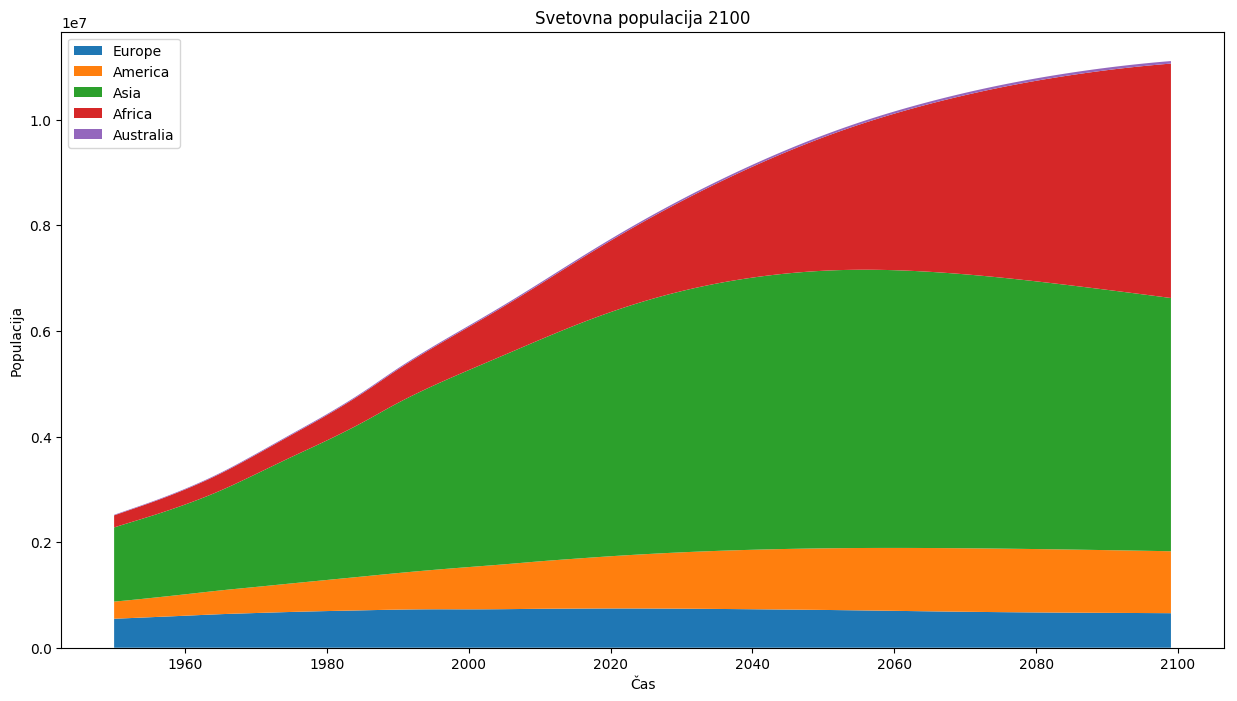

In [38]:
region = defaultdict()
def worldPopulationVisualisationFuture(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2100)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,8))
    plt.stackplot(x, europe, america, asia, africa, australia, labels=['Europe', 'America', "Asia", "Africa", "Australia"])
    plt.legend(loc='upper left')
    plt.title("Svetovna populacija 2100")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

worldPopulationVisualisationFuture("WPP2017_TotalPopulationBySex.csv")

<h2>Populacija celin skozi čas</h2>


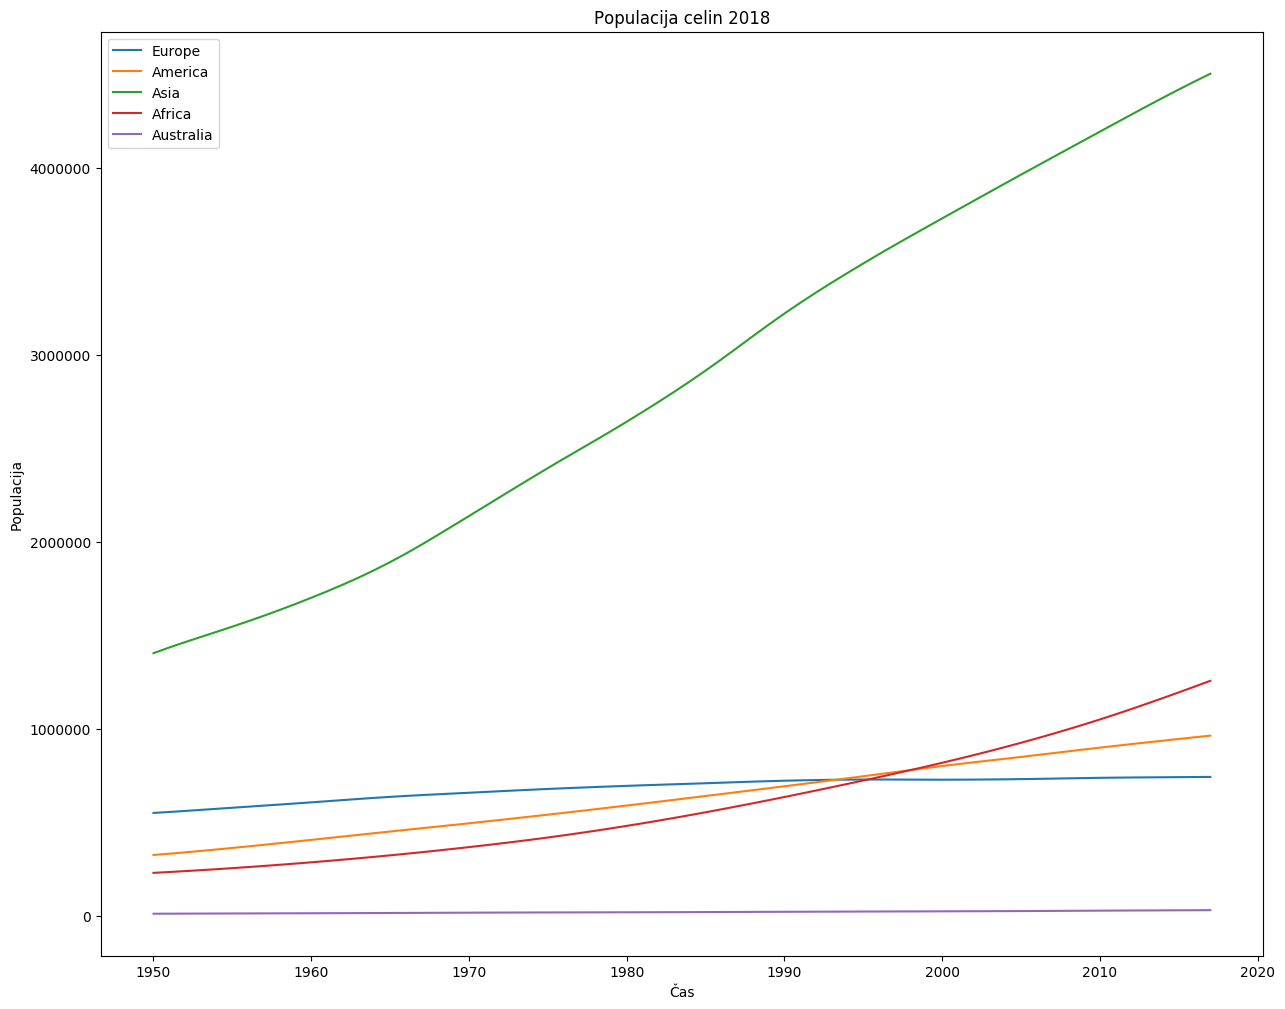

In [36]:
region = defaultdict()
def continentsPopulationVisualisation(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2018)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,12))
    plt.plot(x, europe)
    plt.plot(x, america)
    plt.plot(x, asia)
    plt.plot(x, africa)
    plt.plot(x, australia)
    plt.legend(['Europe', 'America', "Asia", "Africa", "Australia"], loc='upper left')
    plt.title("Populacija celin 2018")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

continentsPopulationVisualisation("WPP2017_TotalPopulationBySex.csv")

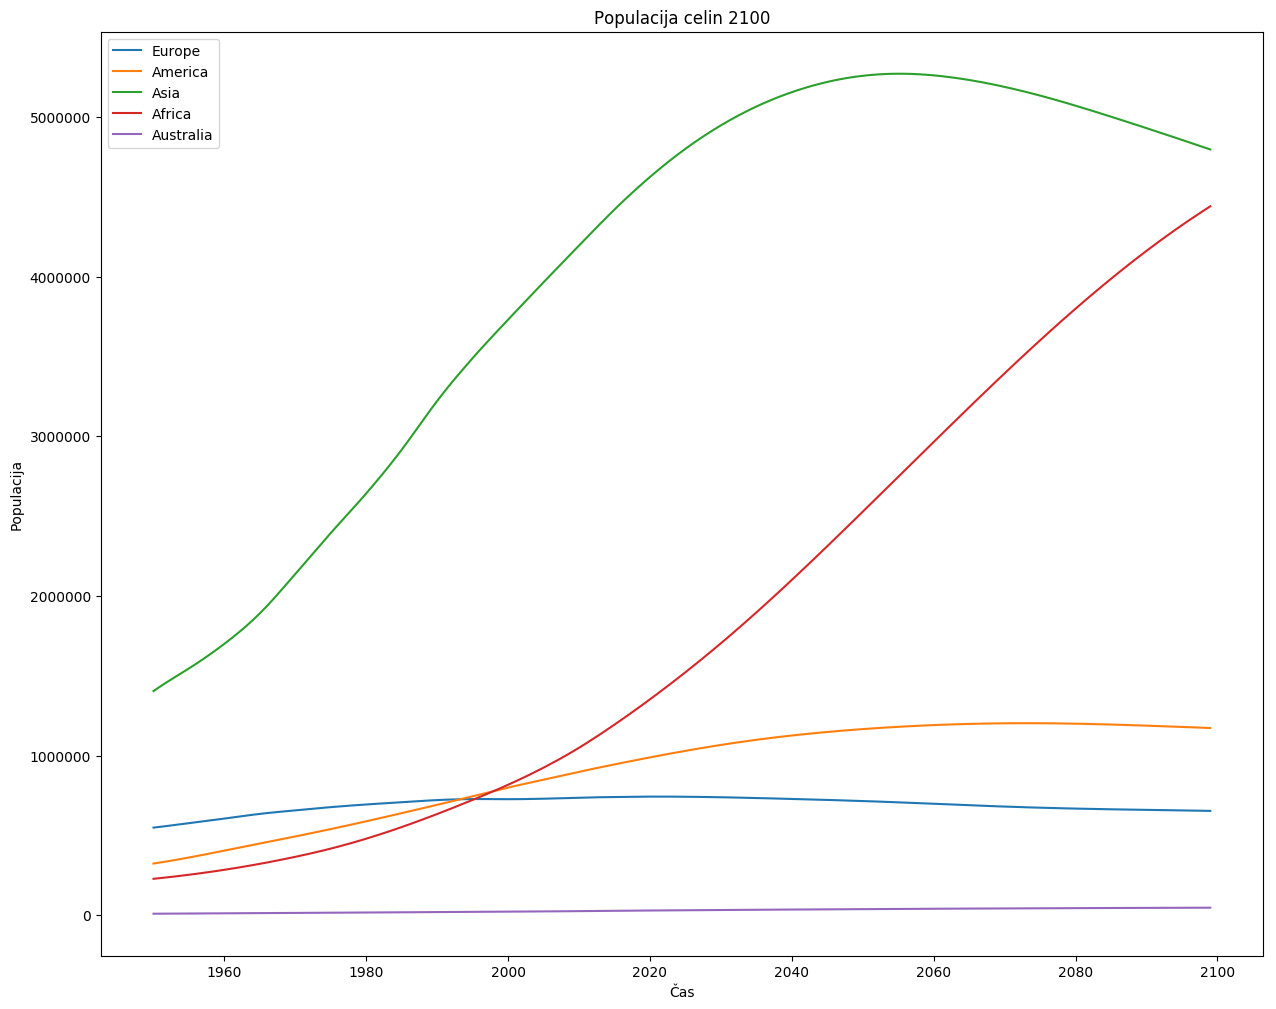

In [37]:
region = defaultdict()
def continentsPopulationVisualisationFuture(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2100)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,12))
    plt.plot(x, europe)
    plt.plot(x, america)
    plt.plot(x, asia)
    plt.plot(x, africa)
    plt.plot(x, australia)
    plt.legend(['Europe', 'America', "Asia", "Africa", "Australia"], loc='upper left')
    plt.title("Populacija celin 2100")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

continentsPopulationVisualisationFuture("WPP2017_TotalPopulationBySex.csv")

<h2>Število rojstev glede na celino</h2>
Povprečno število rojenih otrok na matero na neki celini.

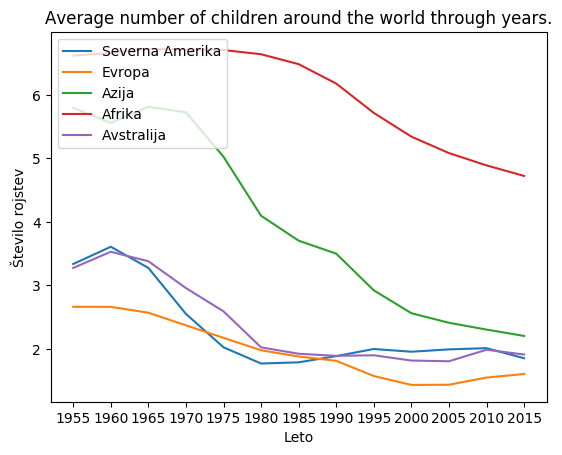

In [40]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

filename = "WPP2017_Period_Indicators_Medium.csv"

#-----Tukaj vstavi argument-------
argument = "TFR"
#---------------------------------

region = defaultdict()
def readData(filename):
    dictionary = defaultdict(list)
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        births = row[argument]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary["Europe"].append(float(births))
            elif "Northern America" == row["Location"]:
                dictionary["Northern America"].append(float(births))
            elif "Southern America" == row["Location"]:
                dictionary["Southern America"].append(float(births))
            elif "Asia" == row["Location"]:
                dictionary["Asia"].append(float(births))
            elif "Africa" == row["Location"]:
                dictionary["Africa"].append(float(births))
            elif "Australia/New Zealand" == row["Location"]:
                dictionary["Australia"].append(float(births))
    return dictionary

region = readData(filename)
time_periods = list(range(1955,2016,5))

x = np.array(range(13))
plt.xticks(x, time_periods)
plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
#ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

plt.xlabel("Leto")
plt.ylabel("Število rojstev")
plt.title("Average number of children around the world through years.")

plt.legend(loc='upper left')

plt.show()

<h2>Demografske piramide</h2>

In [13]:
def ageGroupVisualisation(filename, year, continent):
    dictionaryM = dict()
    dictionaryF = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        time = row["Time"]
        populationM = row["PopMale"]
        populationF = row["PopFemale"]
        age = row["AgeGrp"]
        if row["VarID"] == "2" and time == str(year):
            if continent == "America":
                if "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == \
                        row["Location"]:
                    if age not in dictionaryM:
                        dictionaryM[age] = float(populationM)
                    else:
                        dictionaryM[age] += float(populationM)
                    if age not in dictionaryF:
                        dictionaryF[age] = float(populationF)
                    else:
                        dictionaryF[age] += float(populationF)
            elif continent == row["Location"]:
                dictionaryM[age] = float(populationM)
                dictionaryF[age] = float(populationF)
    labels = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
    populationM = []
    populationF = []
    for lb in labels:
        if(lb in dictionaryM):
            populationM.append(dictionaryM[lb])
        if(lb in dictionaryF):
            populationF.append(dictionaryF[lb])

    y = np.arange(len(populationM))
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(6, 5))
    axes[0].barh(y, populationM, align='center', color='blue', zorder=10)
    axes[0].set(title='Male population')
    axes[1].barh(y, populationF, align='center', color='purple', zorder=10)
    axes[1].set(title='Female population')

    axes[0].invert_xaxis()
    axes[0].set(yticks=y, yticklabels=labels)
    axes[0].yaxis.tick_right()

    for ax in axes.flat:
        ax.margins(0.03)
        ax.grid(True)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.22)
    fig.suptitle(continent+" "+str(year))
    plt.show()

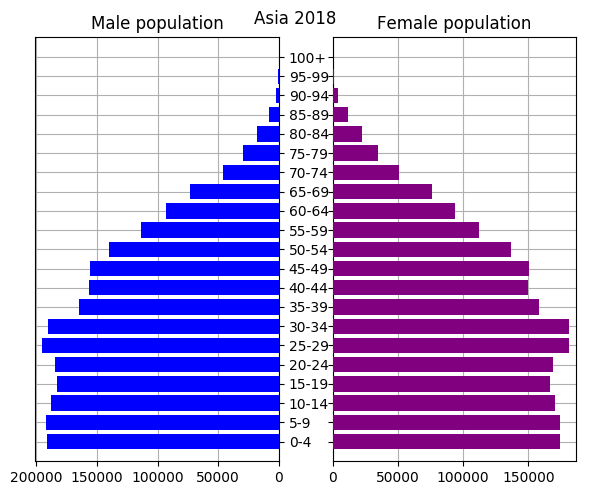

In [97]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Asia")

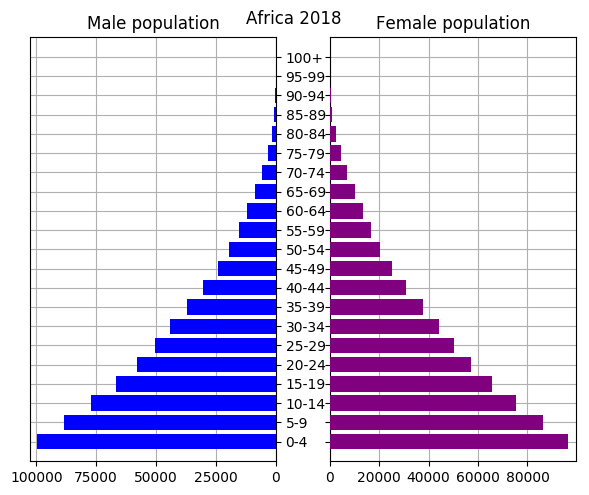

In [98]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Africa")

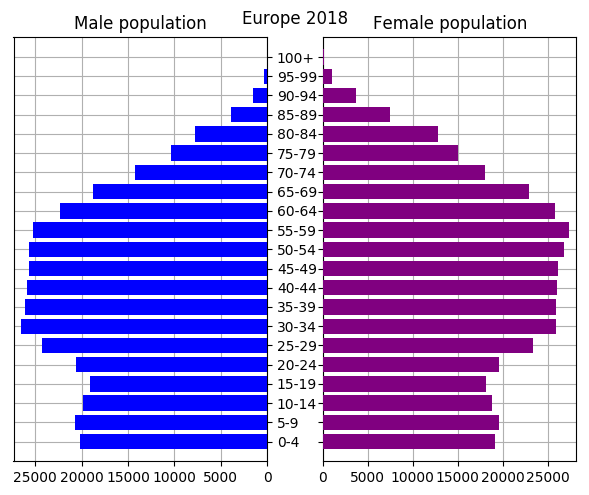

In [99]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Europe")

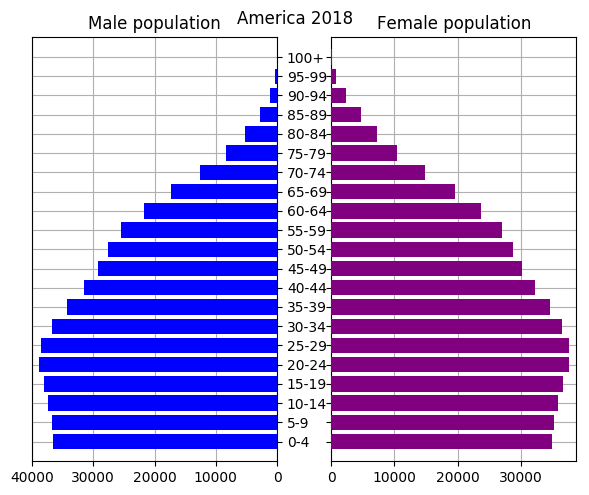

In [100]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "America")

<h2>GDP in število rojstev</h2>
Korelacija med GDP na prebivalca in številom živorojenih otrok na žensko, v državah po vsem svetu.

In [59]:
def birthsGDPCorrelation(filenameBirths, filenameGDP, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if(births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryGDP = dict()
    reader = DictReader(open(filenameGDP, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Name"]
        GDP = row["GDPPC"]
        if country in dictionaryBirths:
            dictionaryGDP[country] = float(GDP)

    gdp = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryGDP:
            births.append(value)
            gdp.append((dictionaryGDP[key]))
    
    plt.rcdefaults()
    fit = np.polyfit(gdp, births, 1)
    #fit_fn = np.poly1d(fit)
    #plt.plot(gdp, births, 'go', gdp, fit_fn(gdp), '--k', ms=4)
    plt.plot(gdp, births, 'go')
    plt.xlim(0, max(gdp)+1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("GDP na osebo v dolarjih")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med GDP in rojstvi v letu "+ str(year))
    plt.show()

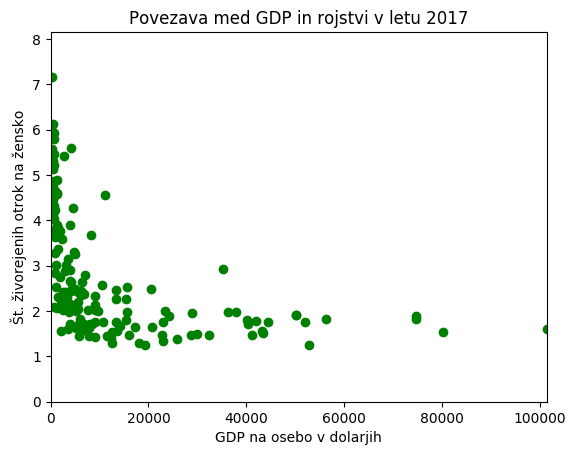

In [60]:
birthsGDPCorrelation("WPP2017_Period_Indicators_Medium.csv", "GDP.csv", 2017)

<h2>Vernost in število rojstev</h2>
Korelacija med procentom nevernih ljudi in številom živorojenih otrok na žensko, v državah po vsem svetu.

In [57]:
def religionBirthCorrelation(filenameBirths, filenameReligion, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if (births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryReligion = dict()
    reader = DictReader(open(filenameReligion, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["country"]
        nonReligious = row["percentage_non_religious"]
        if country in dictionaryBirths:
            dictionaryReligion[country] = float(nonReligious)

    nonReligious = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryReligion:
            births.append(value)
            nonReligious.append((dictionaryReligion[key]))

    plt.rcdefaults()
    fit = np.polyfit(nonReligious, births, 1)
    #fit_fn = np.poly1d(fit)
    #plt.plot(nonReligious, births, 'go', nonReligious, fit_fn(nonReligious), '--k', ms=4)
    plt.plot(nonReligious, births, 'go')
    plt.xlim(0, max(nonReligious) + 1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("Delež nevernih ljudi")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med vernostjo in rojstvi v letu " + str(year))
    plt.show()

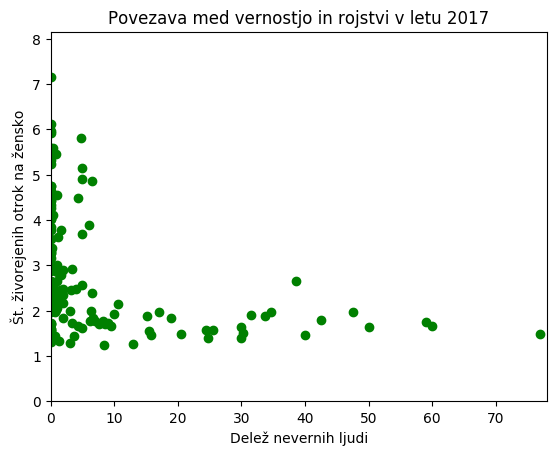

In [58]:
religionBirthCorrelation("WPP2017_Period_Indicators_Medium.csv", "religion.csv", 2017)

<h2>Migracije</h2>
Migracije v celinah - negativna izseljevanja in pozitivna priseljevanja.

In [2]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

filename = "WPP2017_Period_Indicators_Medium.csv"

#-----Tukaj vstavi argument-------
argument = "NetMigrations"
#---------------------------------

region = defaultdict()
def readData(filename):
    dictionary = defaultdict(list)
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        births = row[argument]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary["Europe"].append(float(births))
            elif "Northern America" == row["Location"]:
                dictionary["Northern America"].append(float(births))
            elif "Southern America" == row["Location"]:
                dictionary["Southern America"].append(float(births))
            elif "Asia" == row["Location"]:
                dictionary["Asia"].append(float(births))
            elif "Africa" == row["Location"]:
                dictionary["Africa"].append(float(births))
            elif "Australia/New Zealand" == row["Location"]:
                dictionary["Australia"].append(float(births))
    return dictionary

region = readData(filename)
time_periods = list(range(1955,2016,5))

x = np.array(range(13))
plt.xticks(x, time_periods)

plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
#ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

plt.xlabel("Leto")
plt.ylabel("Število migrantov")
plt.title("Migracije")

plt.legend(loc='upper left')

plt.show()

<Figure size 640x480 with 1 Axes>

<h2>Kitajska</h2>
Podrobnješa analiza kitajske

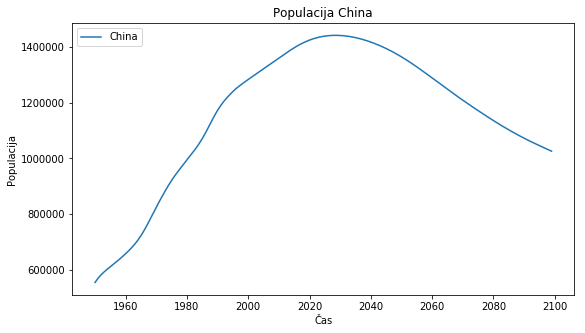

In [47]:
def population(filename, name, endYear):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if country == name:
                dictionary[(time, country)] = float(population)
    y = []
    yearsRange = range(1950, endYear)  #interval is adjustable(1950-2100)
    for i in yearsRange:
        y.append(dictionary[(str(i), name)])
    x = yearsRange
    plt.figure(figsize=(9,5))
    plt.plot(x, y)
    plt.legend([name], loc='upper left')
    plt.title("Populacija "+name)
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

population("WPP2017_TotalPopulationBySex.csv", "China", 2100)

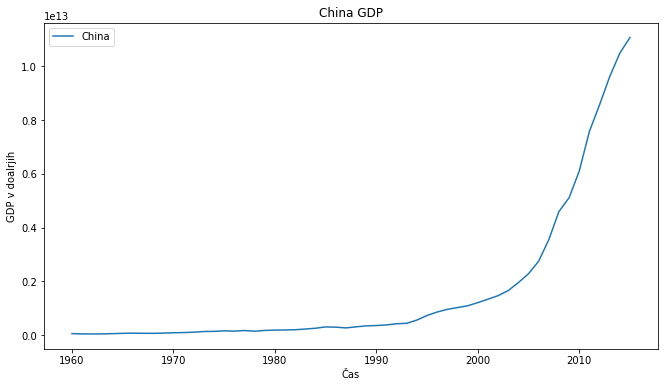

In [4]:
def GDP(filenameGDP, name):
    dictionaryGDP = dict()
    reader = DictReader(open(filenameGDP, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Country Name"]
        GDP = row["Value"] #GDP in current US dollar $
        time = row["Year"]
        if country == name:
            dictionaryGDP[(time, country)] = float(GDP)

    gdp = []
    for key, value in dictionaryGDP.items():
            gdp.append((dictionaryGDP[key]))
    
    y = []
    yearsRange = range(1960, 2016)
    for i in yearsRange:
        y.append(dictionaryGDP[(str(i), name)])
    x = yearsRange
    plt.figure(figsize=(11,6))
    plt.plot(x, y)
    plt.legend([name], loc='upper left')
    plt.title(name+" GDP")
    plt.xlabel("Čas")
    plt.ylabel("GDP v doalrjih")
    plt.show()

GDP("gdp_years.csv", "China")

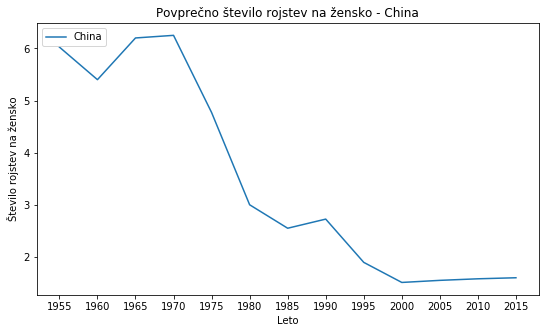

In [54]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
set_printoptions(suppress=True)

#-----Tukaj vstavi argument-------
argument = "TFR"
#---------------------------------

def childrenBorn(name):
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            births = row[argument]
            if row["VarID"] == "2":
                if country == name:
                    dictionary[name].append(float(births))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.figure(figsize=(9,5))
    plt.xticks(x, time_periods)
    plt.plot(x, np.array(region[name][:13]), label=name)

    plt.xlabel("Leto")
    plt.ylabel("Število rojstev na žensko")
    plt.title("Povprečno število rojstev na žensko - "+ name)

    plt.legend(loc='upper left')

    plt.show()
    
childrenBorn("China")

#leta 1970 so uvedli politiko enega otroka zato je viden drastičen upad rojstev na žensko. Rodnost pa se po letu 2013 ni povečala čeprav so zakon opustili. Razloge lahko morda iščemo v višji razvitosti(GDP), zdravstveni oskrbi in planiranju družine.

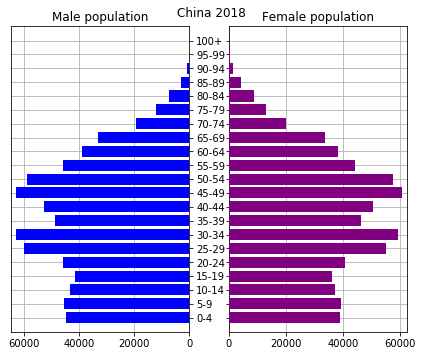

In [28]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "China")

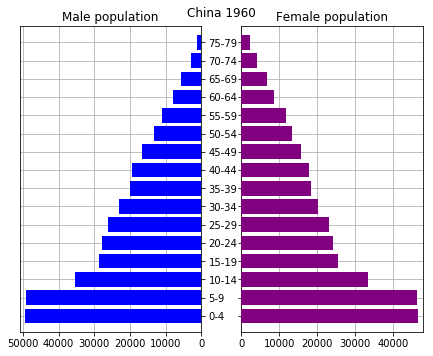

In [27]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 1960, "China")

<h2> Indija </h2>

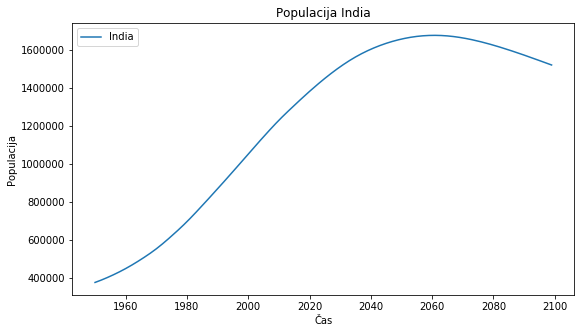

In [48]:
population("WPP2017_TotalPopulationBySex.csv", "India", 2100)

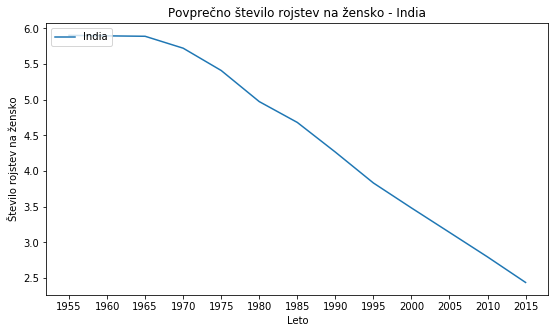

In [20]:
childrenBorn("India")

<h2>Nigerija</h2>

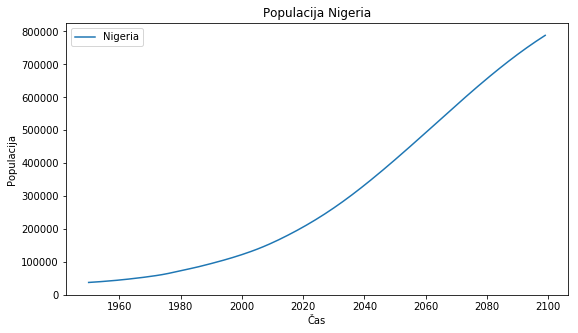

In [49]:
population("WPP2017_TotalPopulationBySex.csv","Nigeria", 2100)

<h2>Slovenija</h2>

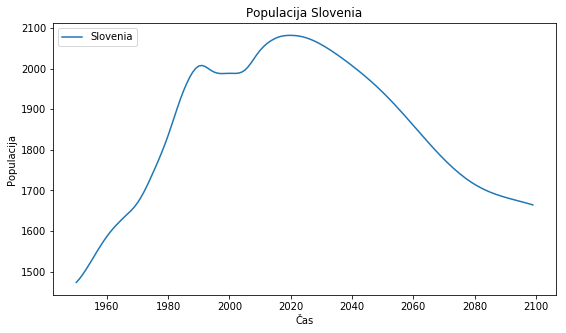

In [50]:
population("WPP2017_TotalPopulationBySex.csv","Slovenia", 2100)

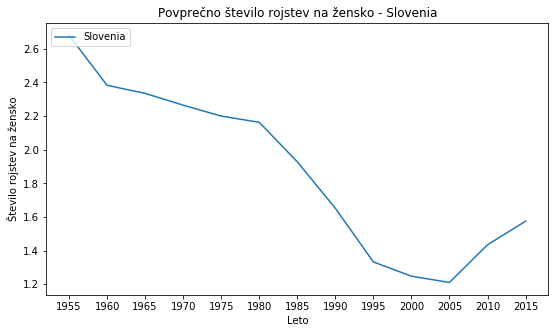

In [17]:
childrenBorn("Slovenia")

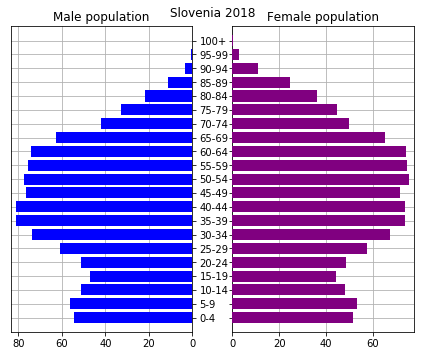

In [29]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Slovenia")

<h2>Mehika</h2>

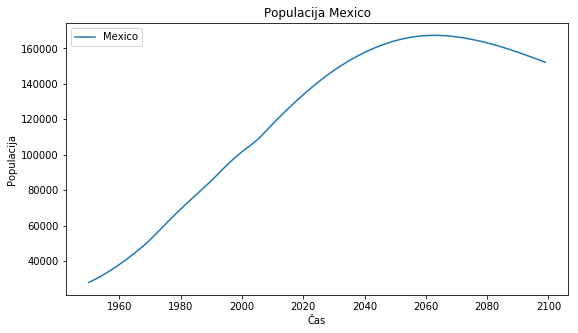

In [51]:
population("WPP2017_TotalPopulationBySex.csv","Mexico", 2100)

<h2>Japonska</h2>

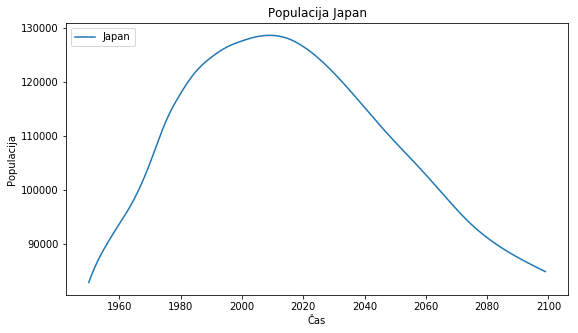

In [52]:
population("WPP2017_TotalPopulationBySex.csv","Japan", 2100)

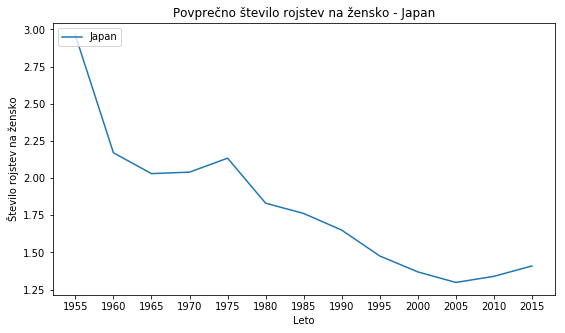

In [24]:
childrenBorn("Japan")

#Oh boi ka dela anime moji dečki.. Velik baby boom je bil elta 1950 in 1975 kar se vidi tudi na demografskih piraidah

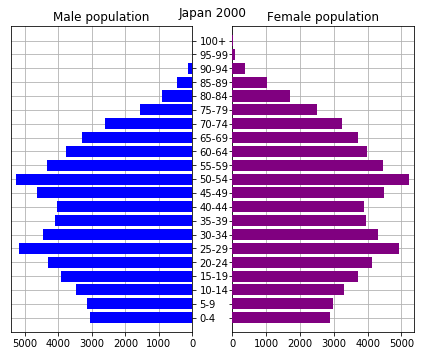

In [25]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2000, "Japan")

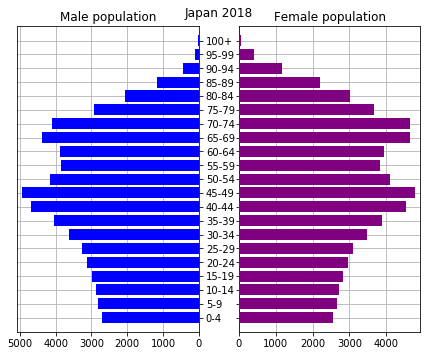

In [26]:
ageGroupVisualisation("WPP2017_PopulationByAgeSex_Medium.csv", 2018, "Japan")

<h2>Funkcije</h2>

In [46]:
def listCountriesByGrowthDesc(): #not sm kr hardcodu kiro leto in koliko držav izpiše
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            growth = row["GrowthRate"]
            if row["VarID"] == "2":
                if time == "2010-2015":
                    dictionary[country].append(float(growth))
        return dictionary

    region = readData(filename)
    i= 0
    print("Seznam najhitreje rastočih držav v letih 2010-2015\n")
    for w in sorted(region, key=region.get, reverse=True):
        if(i<15):
            print("{:4s}{:35}{:.2f} %".format(str(i+1)+".", w, region[w][0]))
            i+=1
        else:
            break
    
listCountriesByGrowthDesc()

Seznam najhitreje rastočih držav v letih 2010-2015

1.  Qatar                              6.65 %
2.  Oman                               6.45 %
3.  Lebanon                            5.99 %
4.  Kuwait                             5.44 %
5.  Jordan                             4.86 %
6.  Equatorial Guinea                  4.24 %
7.  Niger                              3.83 %
8.  Angola                             3.52 %
9.  Uganda                             3.37 %
10. Democratic Republic of the Congo   3.33 %
11. South Sudan                        3.31 %
12. Chad                               3.29 %
13. Gabon                              3.26 %
14. Iraq                               3.21 %
15. Caribbean Netherlands              3.20 %


In [43]:
def listCountriesByGrowthAsc(): #not sm kr hardcodu kiro leto in koliko držav izpiše
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            growth = row["GrowthRate"]
            if row["VarID"] == "2":
                if time == "2010-2015":
                    dictionary[country].append(float(growth))
        return dictionary

    region = readData(filename)
    i= 0
    print("Države v katerih prebivalstvo najhitreje pada (2010-2015)\n")
    for w in sorted(region, key=region.get, reverse=False):
        if(i<15):
            print("{:4s}{:30}{:.2f} %".format(str(i+1)+".", w, region[w][0]))
            i+=1
        else:
            break
    
listCountriesByGrowthAsc()

Države v katerih prebivalstvo najhitreje pada (2010-2015)

1.  Syrian Arab Republic          -2.30 %
2.  Wallis and Futuna Islands     -2.13 %
3.  Andorra                       -1.59 %
4.  Georgia                       -1.37 %
5.  Lithuania                     -1.27 %
6.  Latvia                        -1.23 %
7.  Cook Islands                  -1.22 %
8.  Bosnia and Herzegovina        -1.03 %
9.  Saint Helena                  -0.67 %
10. Bulgaria                      -0.62 %
11. Bermuda                       -0.62 %
12. Romania                       -0.56 %
13. Ukraine                       -0.50 %
14. Martinique                    -0.46 %
15. Portugal                      -0.44 %


In [64]:
# import matplotlib     #Koda za izračun Korelacije med atributi
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib import cm as cm

# filename = "WPP2017_Period_Indicators_Medium.csv"
# from pandas import DataFrame, read_csv
# df = read_csv(open(filename, 'rt', encoding='utf-8'))
# df = df.drop(df.columns[[0, 1, 2, 3, 4, 5]], axis=1)

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# cmap = cm.get_cmap('jet', 30)
# cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
# ax1.grid(True)
# plt.title('Korelacija med atributi')
# labels=["TFR","NRR","CBR","Births","LEx","LExMale","LExFemale","IMR","Q5","CDR","Deaths","DeathsMale","DeathsFemale","CNMR","NetMigrations","GrowthRate","NatIncr","SRB","MAC",]
# ax1.set_xticklabels(labels,fontsize=6)
# ax1.set_yticklabels(labels,fontsize=6)
# # Add colorbar, make sure to specify tick locations to match desired ticklabels
# fig.colorbar(cax, ticks=[0, .1, .2, .3, .4, .50, .60, .70, .8, .90, 1])
# plt.show()


# #drug način
# corr = df.corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# plt.show()

ImportError: No module named 'pandas'